In [1]:
import xml.etree.ElementTree as ET
import os
import re

In [2]:
PATTERN1 = re.compile(r"(?<=[a-zA-Z])\n")
PATTERN2 = re.compile(r"\s+")

def clean_text(text):
    out = PATTERN1.sub(". ", text)
    return PATTERN2.sub(" ", out)

In [3]:
def load_data(path, n_doc=None):
    data = []
    count = 0
    for file in os.listdir(path):
        with open(f"{path}/{file}", "r") as f:
            raw = f.read()
        root = ET.fromstring(raw)
        doc = clean_text(root.find("body").text)
        for summary in root.find("summaries").findall("summary"):
            if summary.attrib["ratio"] == "10":
                kind = summary.attrib["type"]
                text = clean_text(summary.find("body").text)
                data.append((doc, text, kind))
        if n_doc:
            count += 1
            if count == n_doc:
                break
    return data

In [4]:
data = load_data("PSC_1.0/data", 1)

# Automatyczne tworzenie podsumowań

## TextRank

In [5]:
import numpy as np
import pandas as pd
import spacy

nlp = spacy.load('pl_core_news_md')

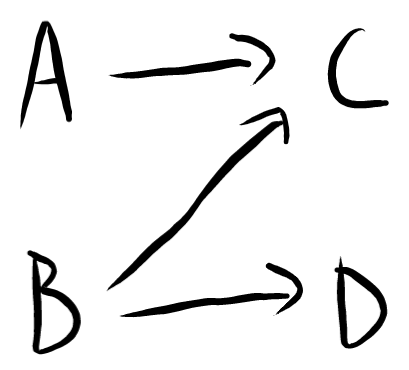

In [6]:
mx = np.array([[0, 0, 0, 0], [0, 0, 0, 0], [1, 0.5, 0, 0], [0, 0.5, 0, 0]])
pd.DataFrame(mx, columns=["A", "B", "C", "D"], index=["A", "B", "C", "D"])

,A,B,C,D
A,0.0,0.0,0.0,0.0
B,0.0,0.0,0.0,0.0
C,1.0,0.5,0.0,0.0
D,0.0,0.5,0.0,0.0


In [7]:
page_rank = np.array([1, 1, 1, 1])
d = 0.85

In [8]:
for i in range(5):
    page_rank = (1 - d) + d * np.dot(mx, page_rank)
    print(f"iteracja: {i} - page rank: {page_rank}")

iteracja: 0 - page rank: [0.15  0.15  1.425 0.575]
iteracja: 1 - page rank: [0.15    0.15    0.34125 0.21375]
iteracja: 2 - page rank: [0.15    0.15    0.34125 0.21375]
iteracja: 3 - page rank: [0.15    0.15    0.34125 0.21375]
iteracja: 4 - page rank: [0.15    0.15    0.34125 0.21375]


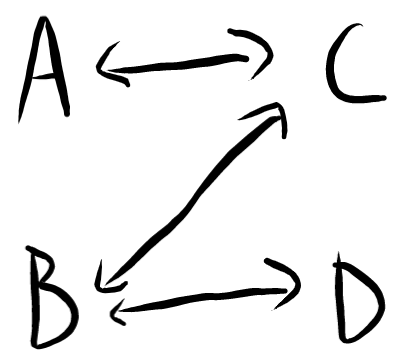

In [9]:
mx = np.array([[0, 0, 0.5, 0], [0, 0, 0.5, 1], [1, 0.5, 0, 0], [0, 0.5, 0, 0]])
pd.DataFrame(mx, columns=["A", "B", "C", "D"], index=["A", "B", "C", "D"])

,A,B,C,D
A,0.0,0.0,0.5,0.0
B,0.0,0.0,0.5,1.0
C,1.0,0.5,0.0,0.0
D,0.0,0.5,0.0,0.0


In [10]:
page_rank = np.array([1, 1, 1, 1])
d = 0.85

In [11]:
for i in range(5):
    page_rank = (1 - d) + d * np.dot(mx, page_rank)
    print(f"iteracja: {i} - page rank: {page_rank}")

iteracja: 0 - page rank: [0.575 1.425 1.425 0.575]
iteracja: 1 - page rank: [0.755625 1.244375 1.244375 0.755625]
iteracja: 2 - page rank: [0.67885937 1.32114062 1.32114062 0.67885937]
iteracja: 3 - page rank: [0.71148477 1.28851523 1.28851523 0.71148477]
iteracja: 4 - page rank: [0.69761897 1.30238103 1.30238103 0.69761897]


In [12]:
raw_doc, summary, _ = data[0]
print(raw_doc)

ŚWIĘTO NIEPODLEGŁOŚCI. Nic nie jest dobitniejszym świadectwem solidarności niż praca dla dobra wspólnego. Poszerzanie wolności. RYS. ANDRZEJ LEGUS. JERZY BUZEK. Święto Niepodległości, na przełomie tysiącleci, stwarza szczególną okazję do refleksji nad dokonaniami dwóch pokoleń: tego, którego udziałem stało się w 1918 roku odzyskanie wolności i tego, które niepodległą Rzeczpospolitą od dziesięciu lat współtworzy. Jakie pożytki czerpiemy dziś z ponownie odzyskanej wolności? Jaka jest dzisiejsza wymowa słowa patriotyzm? Jak teraz układają się relacje między Polakami a ich państwem? Na czym w 1999 roku polega czyn obywatelski? Odpowiedzi na te pytania postanowiłem w tym roku poszukać w Krakowie, "mateczniku polskości", w mieście, gdzie historia i współczesność przenikają się w stopniu najpełniejszym. Dziedzictwo. 11 listopada to wielkie i radosne święto. Odzyskanie wolności zawsze stanowi tytuł do narodowej dumy. Dla Polaków czyn zbrojny, który przyniósł wolność, miał wymiar szczególny. Po

In [13]:
print(summary)

11 listopada to wielkie i radosne święto. Dla Polaków czyn zbrojny, który przyniósł wolność, miał wymiar szczególny. Pamięć o tych, którzy mimo upokorzeń i klęsk nigdy nie pogodzili się z utratą wolności, a także o tych, którzy ów protest przechowali przez noc nazizmu i komunizmu na zawsze pozostanie źródłem naszej siły. Jak dziś postrzegamy czyn patriotyczny? Dziś narodowy czyn ma swój początek w gminie, gdzie podejmowane są decyzje dotyczące lokalnej społeczności. Kultura narodowa i lokalna są ze sobą splecione. W małych ojczyznach dobrze zagospodarowano wolność. właśnie tam najsilniejsza jest owa pamięć historyczna. W czasach globalizacji nowoczesny patriotyzm rozumiem właśnie jako budowanie Polski na dole, w lokalnej przestrzeni duchowej. czyn obywatelski jest rozumiany jako aktywność społeczna, a nie jako reakcja na zagrożenia zewnętrzne. Jest to także czyn radosny.


In [14]:
N_SENT = 10

```
pip install networkx
```

In [15]:
import networkx
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [16]:
doc = nlp(raw_doc)

In [17]:
norm_doc = [[token.lemma_ for token in sent if token.is_alpha] for sent in doc.sents]

In [18]:
norm_doc[0]

['święto', 'niepodległości']

In [19]:
norm_doc[10]

['jaka', 'jest', 'dzisiejszy', 'wymowa', 'słowo', 'patriotyzm']

In [20]:
vect = TfidfVectorizer(preprocessor=lambda x: x, tokenizer=lambda x: x)
doc_matrix = vect.fit_transform(norm_doc)

In [21]:
similarity_matrix = cosine_similarity(doc_matrix)

In [22]:
pd.DataFrame(similarity_matrix)

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.227830,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.259506,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
2,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.963871,0.106000,0.000000,0.0,0.000000,0.0,0.0
3,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.064301,0.134055,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
4,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.064404,0.000000,...,0.019124,0.000000,0.146590,0.000000,0.000000,1.000000,0.0,0.023658,0.0,0.0
105,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.0
106,0.259506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.112338,0.000000,...,0.036461,0.115007,0.012348,0.000000,0.000000,0.023658,0.0,1.000000,0.0,0.0
107,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.094953,0.000000,0.0,0.000000,1.0,0.0


In [23]:
similarity_graph = networkx.from_numpy_array(similarity_matrix)

In [24]:
scores = networkx.pagerank(similarity_graph)

In [25]:
ranked_sentences = sorted(scores.items(), key=lambda x: x[1], reverse=True)
ranked_sentences

[(58, 0.015211004942005179),
 (12, 0.013891027145697364),
 (60, 0.013755692688863154),
 (65, 0.01339859588845904),
 (80, 0.013015999279625335),
 (59, 0.012942565317717869),
 (73, 0.012830181260716092),
 (72, 0.012757819533436411),
 (8, 0.012696980566946677),
 (86, 0.012201416731389724),
 (61, 0.01208544161472819),
 (13, 0.012008047468318244),
 (45, 0.011979516765348879),
 (102, 0.01186932188246367),
 (85, 0.011781007543839013),
 (51, 0.011680188042121046),
 (33, 0.011648432000309208),
 (52, 0.011577976567690435),
 (38, 0.011487802144914737),
 (96, 0.01146099585005223),
 (36, 0.011450307091473289),
 (2, 0.011390204178330523),
 (41, 0.011235711933765513),
 (66, 0.011045281599026898),
 (20, 0.011041643128391504),
 (57, 0.011017000887786376),
 (39, 0.01098709505289619),
 (15, 0.010708598518131022),
 (74, 0.010551366863786264),
 (22, 0.010540716789007972),
 (77, 0.010440356335604414),
 (93, 0.010298738007079892),
 (64, 0.010284308899883066),
 (106, 0.010224049425288987),
 (99, 0.01019345718

In [26]:
top_sent_idxs = [x[0] for x in ranked_sentences[:N_SENT]]
top_sent_idxs.sort()
top_sent_idxs

[8, 12, 58, 59, 60, 65, 72, 73, 80, 86]

In [27]:
sents = list(doc.sents)
for idx in top_sent_idxs:
    print(sents[idx])

Święto Niepodległości, na przełomie tysiącleci, stwarza szczególną okazję do refleksji nad dokonaniami dwóch pokoleń: tego, którego udziałem stało się w 1918 roku odzyskanie wolności i tego, które niepodległą Rzeczpospolitą od dziesięciu lat współtworzy.
Na czym w 1999 roku polega czyn obywatelski?
Wybór Krakowa na kulturalną stolicę Europy w roku 2000 potwierdza, że we współczesnym świecie docenia się udział kultury w budowaniu tożsamości, choć w przypadku tego miasta jest to na pewno bardziej kultura narodowa niż lokalna.
W decentralizującej się Europie nie ma bowiem pojęcia prowincji, bo często to właśnie ona stanowić może centrum życia duchowego i kulturalnego.
Kraków jest dziś przykładem tego, jak działania na rzecz ochrony narodowego dziedzictwa wpływają na rozwój miasta i warunki życia jego mieszkańców.
Dlatego dobre państwo trzeba i warto budować na fundamencie lokalnego dziedzictwa.
Czym jest dziś czyn obywatelski?
Myślę, że po raz pierwszy w naszej historii jest to czyn rozum

### Gensim

In [28]:
from gensim.summarization import summarize

In [29]:
summary = summarize(raw_doc, split=True, ratio=0.1)

In [30]:
for sentence in summary:
    print(sentence)

Nic nie jest dobitniejszym świadectwem solidarności niż praca dla dobra wspólnego.
Święto Niepodległości, na przełomie tysiącleci, stwarza szczególną okazję do refleksji nad dokonaniami dwóch pokoleń: tego, którego udziałem stało się w 1918 roku odzyskanie wolności i tego, które niepodległą Rzeczpospolitą od dziesięciu lat współtworzy.
Pamięć o tych, którzy mimo 123 lat niewoli, upokorzeń i klęsk, nigdy nie pogodzili się z utratą wolności, a także o tych, którzy ów protest przechowali przez noc nazizmu i komunizmu na zawsze pozostanie źródłem naszej siły.
Kraków jest dziś przykładem tego, jak działania na rzecz ochrony narodowego dziedzictwa wpływają na rozwój miasta i warunki życia jego mieszkańców.
Było to możliwe także dlatego, że właśnie tam najsilniejsza jest owa pamięć historyczna, która sto lat temu pozwoliła przetrwać zły czas.
Czym jest dziś czyn obywatelski?
Trudno bowiem było wskazać w naszej historii czas, gdy zarazem czyn obywatelski nie wiązał się z ofiarą i wyrzeczeniem,